In [1]:
import torch
import numpy as np
import gymnasium as gym
from matplotlib import pyplot as plt
from td3 import TD3
import laserhockey.hockey_env as h_env
import laserhockey.laser_hockey_env as lh

In [2]:
env_string = "HockeyEnv"

In [3]:
if env_string == "LunarLander-v2":
    env = gym.make(env_string, continuous=True)
elif env_string == "HockeyEnv":
    env = h_env.HockeyEnv(mode=h_env.HockeyEnv.NORMAL)
    hockey_opponent = h_env.BasicOpponent(weak=False)
elif env_string == "LaserHockeyEnv":
    env = lh.LaserHockeyEnv(mode=lh.LaserHockeyEnv.NORMAL)
    hockey_opponent = lh.BasicOpponent()
else:
    env = gym.make(env_string)

In [4]:
agent = TD3(
    env,
    env_string=env_string,
    epochs=45000,
    steps_max=1000,
    action_noise_scale=0.15,
    prioritized_replay=False,
    gradient_steps=200,
    hockey_opponent=hockey_opponent,
    noise_mode="ornstein-uhlenbeck",
)

In [6]:
agent.test(render_mode="human", noise_enabled=False)

9.908977573769105

In [8]:
# agent.env.close()

In [7]:
(
    episode_rewards,
    test_rewards,
    episode_steps,
    ep_durations,
    upd_durations,
    ep_actor_losses,
    ep_critic_losses,
) = agent.train()

Epoch 10:
                                rewards: train: 0.00, test: -12.69
                                            max train reward: 9.11
                                avg_steps: 232.40
                                losses:
                                    actor: mean: 0.25, first: 0.25, last: 0.27
                                    critic: mean: 0.00, first: 0.01, last: 0.00
                                avg_duration: 0.06, upd_duration: 0.35
                    
Epoch 20:
                                rewards: train: -26.53, test: 0.00
                                            max train reward: 0.00
                                avg_steps: 238.00
                                losses:
                                    actor: mean: 0.38, first: 0.36, last: 0.38
                                    critic: mean: 0.01, first: 0.01, last: 0.00
                                avg_duration: 0.06, upd_duration: 0.37
                    
Epoch 30:
                    

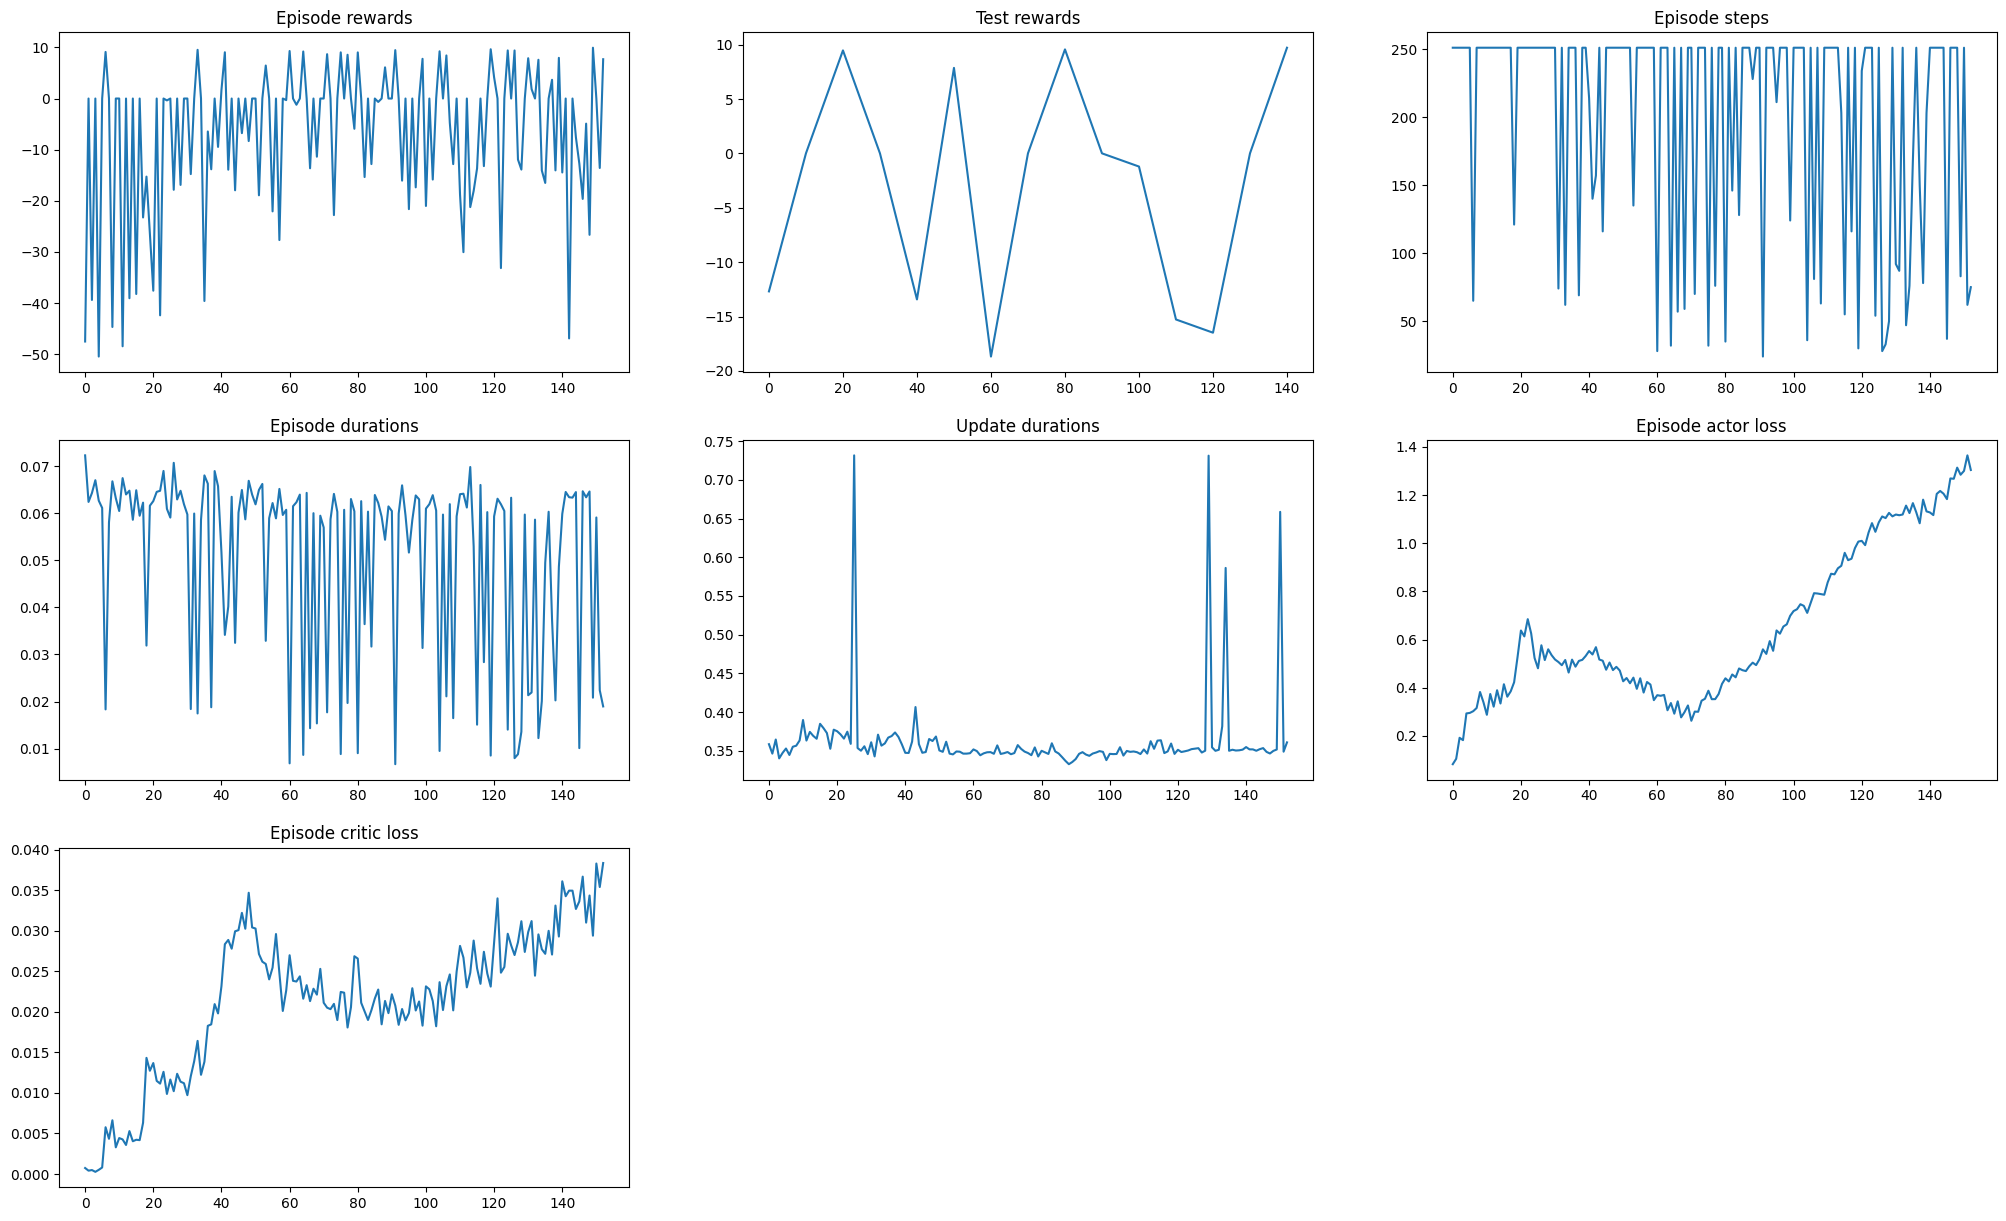

In [8]:
# plot all
plt.figure(figsize=(25, 15))
plt.subplot(3, 3, 1)
plt.plot(episode_rewards)
plt.title("Episode rewards")
plt.subplot(3, 3, 2)
plt.plot(np.arange(len(test_rewards))*10, test_rewards)
# plt.scatter(np.arange(len(test_rewards))*10, test_rewards, s=2, alpha=0.2)
plt.title("Test rewards")
plt.subplot(3, 3, 3)
plt.plot(episode_steps)
plt.title("Episode steps")
plt.subplot(3, 3, 4)
plt.plot(ep_durations)
plt.title("Episode durations")
plt.subplot(3, 3, 5)
plt.plot(upd_durations)
plt.title("Update durations")
plt.subplot(3, 3, 6)
plt.plot(ep_actor_losses)
plt.title("Episode actor loss")
plt.subplot(3, 3, 7)
plt.plot(ep_critic_losses)
plt.title("Episode critic loss")
plt.show()

In [9]:
# save policy and q function
torch.save(agent.policy.state_dict(), "policy.pt")
torch.save(agent.q1.state_dict(), "q1.pt")
torch.save(agent.q2.state_dict(), "q2.pt")

In [ ]:
# # plot
# plt.figure(figsize=(10, 5))
# plt.plot(ep_rewards, label="train")
# plt.xlabel("epochs")
# plt.ylabel("reward")

# test_epochs = np.arange(0, len(test_rewards)) * 10
# plt.scatter(test_epochs, test_rewards, label="test", color="red", marker="x", zorder=100, s=10)

In [ ]:
# env = gym.make(env_string, render_mode="rgb_array")

In [ ]:
from tqdm import tqdm

In [10]:
wins = 0
draws = 0
for i in range(100):
    agent.test(render_mode=None, noise_enabled=False)
    if agent.env.winner == 1:
        wins += 1
    elif agent.env.winner == 0:
        draws += 1

print("wins: ", wins)
print("draws: ", draws)

wins:  35
draws:  34


In [17]:
agent.test(noise_enabled=False, render_mode="human")

9.83703864506214

In [ ]:
class MyHockeyOpponent:
    def __init__(self):
        pass

    def act(self, obs):
        return agent.get_action(obs, noise=False)
    
agent.hockey_opponent = MyHockeyOpponent()

In [ ]:
agent.test(noise_enabled=False, render_mode="human")

9.42708101710721

In [ ]:
# # test normal
# env_normal = h_env.HockeyEnv(mode=0)
# agent.env = env_normal
# agent.test(noise_enabled=False, render_mode="human")
# agent.env = env

In [ ]:
# sample from buffer
# state, action, reward, next_state, done = agent.replay_buffer.sample(10)
# state = torch.tensor(state, dtype=torch.float32)
# agent.update_policy(state)

In [ ]:
# combined = torch.cat((state, action), dim=-1)
# qval = agent.q1(combined)
# qval

In [ ]:
# noise_policy = lambda x: agent.get_action(x, noise=True)

In [ ]:
# play(env, noise_policy, steps=1000, render_every=4)

In [ ]:
max(test_rewards)

In [ ]:
# test for some values
state, info = env.reset()
action = agent.get_action(torch.tensor(state, dtype=torch.float32), noise=False)
qval = agent.get_q1(
    torch.tensor(state, dtype=torch.float32), torch.tensor(action, dtype=torch.float32)
)
# print

print("state: ", state)
print("action: ", action)
print("qval: ", qval)

state:  [-0.5729768  0.       ]
action:  [0.00224565]
qval:  tensor(-0.3332, grad_fn=<SqueezeBackward0>)


Text(0.5, 1.0, 'Q function')

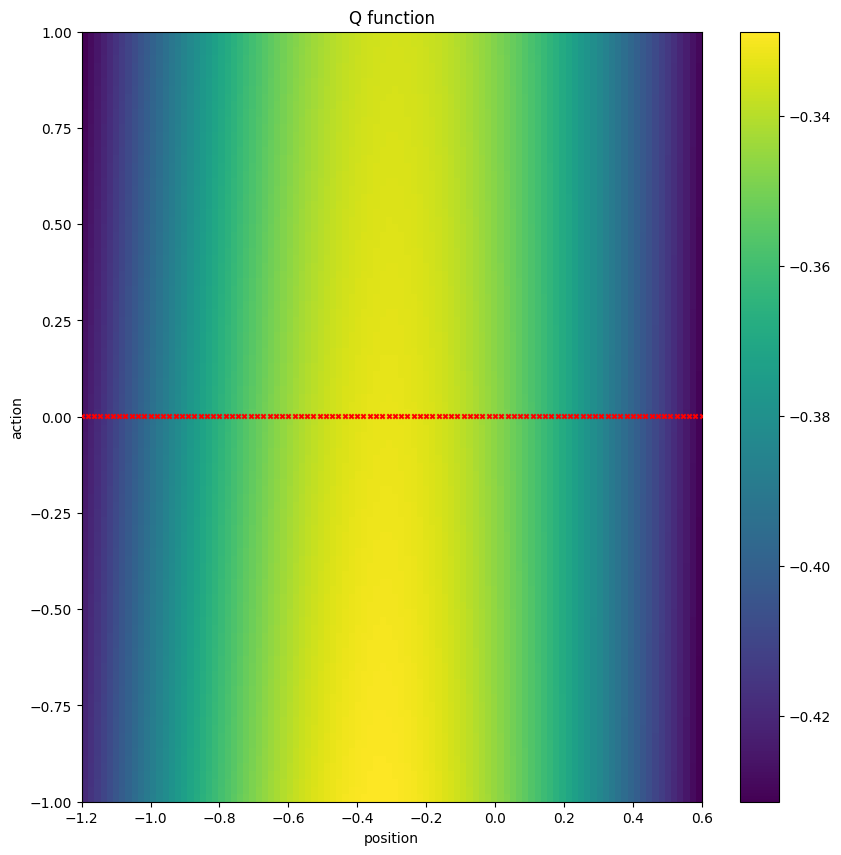

In [ ]:
%matplotlib inline
q = agent.q1
# plot q function over state space
# sample states
n = 100
x = np.linspace(-1.2, 0.6, n)
y = 0.0
actions = np.linspace(-1.0, 1.0, n)

states = np.zeros((n, 2))
for i in range(n):
    states[i, :] = np.array([x[i], y])

# compute q values
q_values = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        q_values[i, j] = q(torch.hstack((torch.tensor(states[i], dtype=torch.float32), torch.tensor(actions[j], dtype=torch.float32)))).detach().numpy()

policy_actions = np.zeros((n))
for i in range(n):
    policy_actions[i] = agent.get_action(torch.tensor(states[i], dtype=torch.float32), noise=False)

# plot 2d
plt.figure(figsize=(10, 10))
plt.imshow(q_values, extent=[-1.2, 0.6, -1.0, 1.0], aspect="auto")
plt.colorbar()
plt.scatter(states[:, 0], policy_actions, color="red", marker="x", zorder=100, s=10)

plt.xlabel("position")
plt.ylabel("action")
plt.title("Q function")

In [ ]:
state = np.array([-0.9, 0])
state = torch.tensor(state, dtype=torch.float32)
print(agent.get_action(state, noise=False))


agent.update_policy(state)

[0.03972045]


6.6863226890563965

In [ ]:
# from torchviz import make_dot

# # TODO: find performance bottleneck in torch

# state, info = env.reset()
# state = torch.tensor(state, dtype=torch.float32)
# action = agent.policy(state)

# combined = torch.cat((state, action), dim=-1)

# qval = agent.q1(combined)

# grad_plot = make_dot(qval, show_attrs=True, show_saved=True)

# #save grad plot
# grad_plot.format = "png"
# grad_plot.render("grad_plot")